#### EDA

In [122]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [123]:
cv10_data_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/cv10_data/cv10_data.npy'
cv10_labels_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/cv10_labels.npy'
test10_data_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/test10_data/test10_data.npy'
test10_labels_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/test10_labels.npy'
training_zero_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/training10_0/training10_0.tfrecords'
training_one_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/training10_0/training10_0.tfrecords'
training_two_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/training10_0/training10_0.tfrecords'
training_three_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/training10_0/training10_0.tfrecords'
training_four_filepath = '/Users/dylanhayashi/Desktop/Northwestern/493 - Capstone/CBIS-DDSM tf/training10_0/training10_0.tfrecords'

In [124]:
cv10_data = np.load(cv10_data_filepath)
cv10_labels = np.load(cv10_labels_filepath)
test10_data = np.load(test10_data_filepath)
test10_labels = np.load(test10_labels_filepath)

In [125]:
training_zero = tf.data.TFRecordDataset(training_zero_filepath)
training_one = tf.data.TFRecordDataset(training_one_filepath)
training_two = tf.data.TFRecordDataset(training_two_filepath)
training_three = tf.data.TFRecordDataset(training_three_filepath)
training_four = tf.data.TFRecordDataset(training_four_filepath)

#### Combine training, validation, and test sets into single dataset

In [126]:
training_images = []
training_labels = []

feature_dictionary = {
    'label':tf.io.FixedLenFeature([],tf.int64),
    'label_normal':tf.io.FixedLenFeature([],tf.int64),
    'image':tf.io.FixedLenFeature([],tf.string)
}

def _parse_function(example,feature_dictionary=feature_dictionary):
  parsed_example = tf.io.parse_example(example,feature_dictionary)
  return(parsed_example)

def read_data(dataset):
  read_dataset = dataset.map(_parse_function)
  for features in read_dataset:
      image = tf.io.decode_raw(features['image'], tf.uint8)
      image = tf.reshape(image, [299, 299,1])        
      image=image.numpy()    
      training_images.append(image)
      training_labels.append(features['label'].numpy())

for training_dataset in [training_zero,training_one,training_two,training_three,training_four]:
  read_data(training_dataset)

In [127]:
images = np.concatenate((training_images,cv10_data,test10_data),axis=0)
labels = np.concatenate((training_labels,cv10_labels,test10_labels),axis=0)

#### Exploratory Data Analysis

In [137]:
# Class Description Dictionary
class_description_dict = {
    0:'Negative',
    1:'Benign Calcification',
    2:'Benign Mass',
    3:'Malignant Calcification',
    4:'Malignant Mass'
}

In [138]:
# Class Descriptive Statistics 

counts = pd.DataFrame(np.bincount(labels))
counts = counts.reset_index(drop=False)
counts = counts.rename(columns={'index':'Class',0:'Count'})
counts['Description'] = ['Negative','Benign Calcification','Benign Mass','Malignant Calcification','Malignant Mass']
counts['Rel Freq'] = round(counts['Count'] / counts['Count'].sum(),4)
counts = counts.iloc[:,[0,2,1,3]]
counts

,Class,Description,Count,Rel Freq
0,0,Negative,61850,0.8681
1,1,Benign Calcification,2768,0.0388
2,2,Benign Mass,2542,0.0357
3,3,Malignant Calcification,1849,0.0260
4,4,Malignant Mass,2240,0.0314


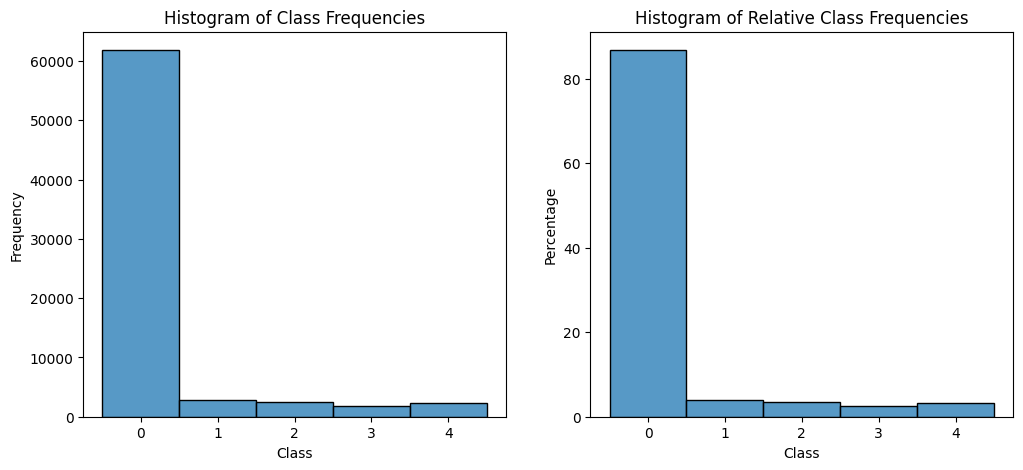

In [139]:
# Class Balances, Histograms

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bins = np.arange(-0.5, 5.5, 1)

# Histogram with frequency
sns.histplot(labels, bins=bins, ax=axes[0], kde=False)
axes[0].set_title('Histogram of Class Frequencies')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(np.arange(0, 5, 1))

# Histogram with relative frequency
sns.histplot(labels, bins=bins, stat="percent", common_norm=False, ax=axes[1], kde=False)
axes[1].set_title('Histogram of Relative Class Frequencies')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Percentage')
axes[1].set_xticks(np.arange(0, 5, 1))

In [140]:
# Visualize Example Images from Each Class

# Get indices for examples of each class
examples_zero = []
examples_one = []
examples_two = []
examples_three = []
examples_four = []

for i in range(len(labels)):
    if len(examples_one) + len(examples_two) + len(examples_three) + len(examples_four) >= 8:
        break
    if labels[i] == 0 and len(examples_zero) < 2:
        examples_zero.append(i)
    if labels[i] == 1 and len(examples_one) < 2:
        examples_one.append(i)
    if labels[i] == 2 and len(examples_two) < 2:
        examples_two.append(i)
    if labels[i] == 3 and len(examples_three) < 2:
        examples_three.append(i)
    if labels[i] == 4 and len(examples_four) < 2:
        examples_four.append(i)

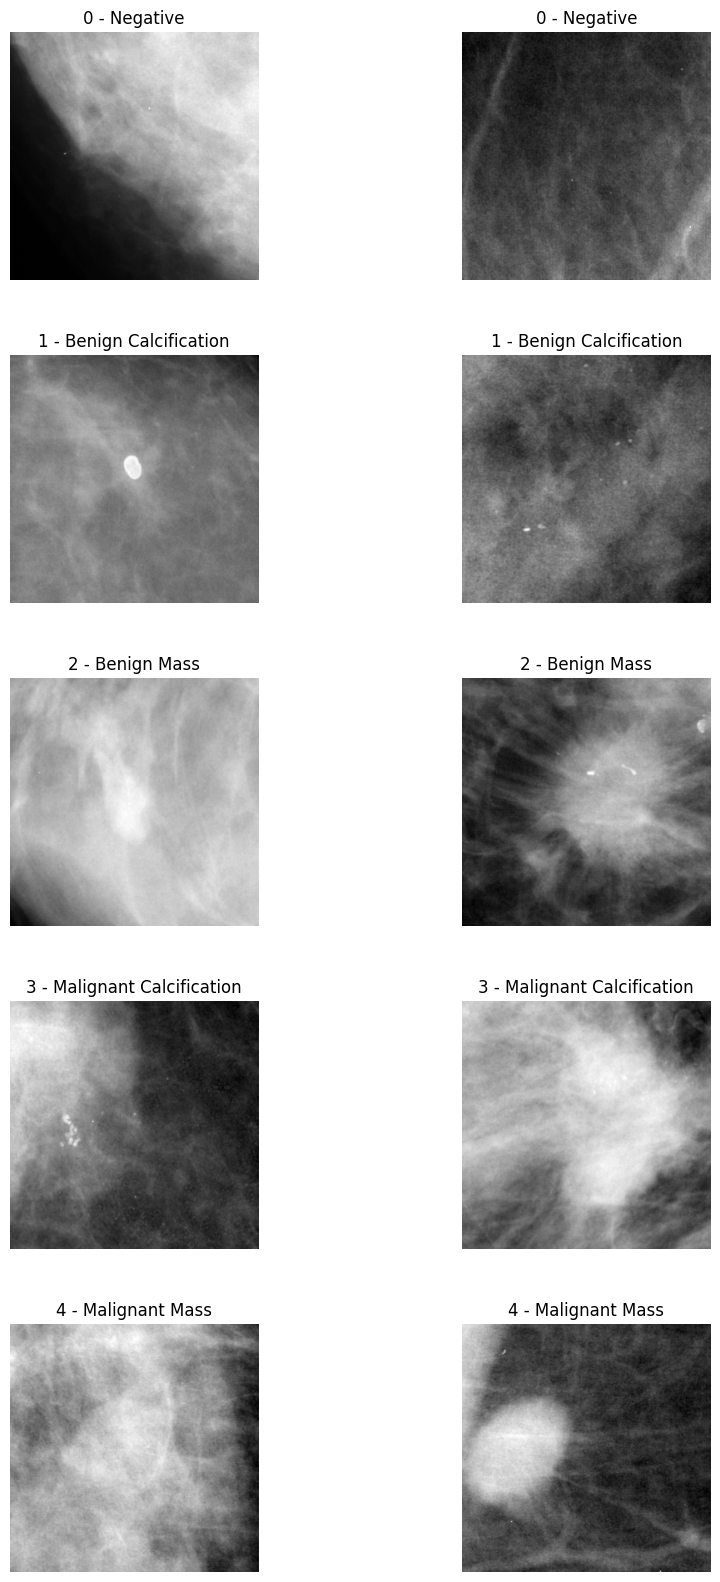

In [142]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))  

# Creating a list of example lists for easier iteration
all_examples = [examples_zero, examples_one, examples_two, examples_three, examples_four]

# Loop through each class's example list
for i, examples in enumerate(all_examples):
    axs[i, 0].imshow(images[examples[0]], cmap='gray')  # First example
    axs[i, 0].set_title(f'{i} - {class_description_dict[i]}')
    axs[i, 1].imshow(images[examples[1]], cmap='gray')  # Second example
    axs[i, 1].set_title(f'{i} - {class_description_dict[i]}')

# Removing x and y ticks
for ax in axs.flat:
    ax.axis('off')

# Adjusting space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.show()
